In [50]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
%matplotlib inline
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.5',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.6'}

In [142]:
circuit = QuantumCircuit(3, 3)

In [143]:
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
circuit.barrier(range(3))
circuit.measure(range(3), range(3))

In [144]:
circuit.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

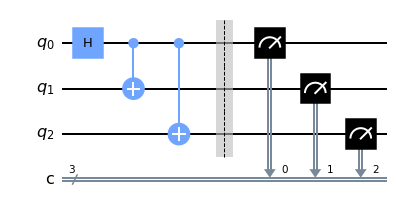

In [145]:
circuit.draw('mpl')


Total count for 000 and 111 are: {'000': 507, '111': 517}


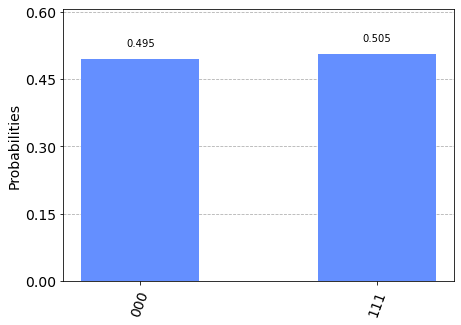

In [147]:
# Run the quantum circuit on a OPENQasm Simulator Backend
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots = 1024)
result = job.result()
counts = result.get_counts(circuit)
print("\nTotal count for 000 and 111 are:", counts)
plot_histogram(counts)

In [148]:
# Run the quantum circuit on a Statevector Simulator Backend
simulator = Aer.get_backend('statevector_simulator')
job = execute(circuit, simulator)
result = job.result()
output = result.get_statevector(circuit, decimals=3)
print(output)

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]


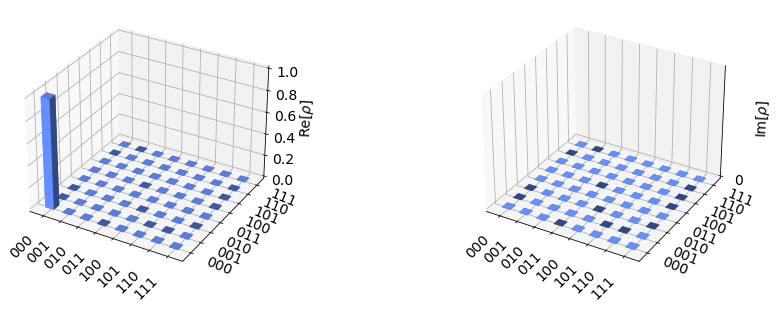

In [151]:
from qiskit.visualization import plot_state_city
job = execute(circuit, simulator)
result = job.result()
output = result.get_statevector(circuit, decimals=3)
plot_state_city(output)

In [152]:
# Run the quantum circuit on a Unitary Simulator Backend
# The quantum circuit should not have Measurement
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)

simulator = Aer.get_backend('unitary_simulator')
job = execute(circuit, simulator)
result = job.result()
output = result.get_unitary(circuit, 3)
print(output)

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.     